In [41]:
import pandas as pd

# Load the dataset (replace with your file path)
df = pd.read_csv(r'C:\Users\Lenovo\Downloads\crude-oil-price.csv')  # Update the path to your dataset


In [42]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Convert 'date' to datetime format


In [43]:
# Remove rows with missing 'date' or 'price' values
df_cleaned = df.dropna(subset=['date', 'price'])


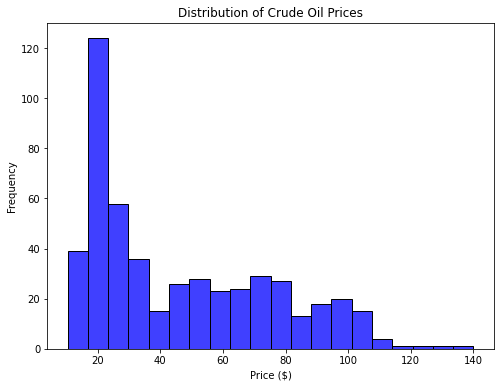

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the oil prices as a histogram (Bar Plot)
plt.figure(figsize=(8,6))  # Set figure size
sns.histplot(df_cleaned['price'], bins=20, kde=False, color='blue')  # Histogram plot
plt.title('Distribution of Crude Oil Prices')  # Title of the plot
plt.xlabel('Price ($)')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.show()  # Display the histogram plot


In [45]:
import numpy as np

# Create a log-transformed feature of the price
df_cleaned['log_price'] = np.log(df_cleaned['price'])  # Log transformation of 'price'


In [46]:
# Convert 'date' to ordinal (numeric format)
df_cleaned['date_ordinal'] = df_cleaned['date'].apply(lambda x: x.toordinal())  # Convert 'date' to ordinal (numeric format)

# Features (X) and target (y)
X = df_cleaned[['date_ordinal']]  # Features: date in numeric form
y = df_cleaned['price']  # Target: price

# Split the dataset into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
from sklearn.linear_model import LinearRegression

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [49]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')  # Print the RMSE


RMSE: 20.95
